In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import time
from scipy.stats import linregress
import scipy.stats as st

In [2]:
response = requests.get('https://covidtracking.com/api/v1/states/daily.json').json()
results = response

In [3]:
field_list = ['date', 'state', 'positive', 'negative', 'pending', 'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently', 'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative', 'recovered', 'hash', 'dateChecked', 'death', 'hospitalized', 'total', 'totalTestResults', 'posNeg', 'fips', 'deathIncrease', 'hospitalizedIncrease', 'negativeIncrease', 'positiveIncrease', 'totalTestResultsIncrease']
results_dict = dict.fromkeys(field_list)
for field in field_list:
    results_dict.update({field : []})

In [4]:
for result in results:
    for field in field_list:
        try:
            results_dict[field].append(result[field])
        except:
            results_dict[field].append(0)

In [5]:
covid_states_df = pd.DataFrame.from_dict(results_dict)
covid_states_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2825 entries, 0 to 2824
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      2825 non-null   int64  
 1   state                     2825 non-null   object 
 2   positive                  2812 non-null   float64
 3   negative                  2789 non-null   float64
 4   pending                   1061 non-null   float64
 5   hospitalizedCurrently     1537 non-null   float64
 6   hospitalizedCumulative    1670 non-null   float64
 7   inIcuCurrently            1134 non-null   float64
 8   inIcuCumulative           892 non-null    float64
 9   onVentilatorCurrently     1049 non-null   float64
 10  onVentilatorCumulative    780 non-null    float64
 11  recovered                 1444 non-null   float64
 12  hash                      2825 non-null   object 
 13  dateChecked               2825 non-null   object 
 14  death   

In [6]:
covid_states_df.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200424,AK,339.0,11942.0,NaN,36.0,NaN,NaN,NaN,NaN,...,NaN,12281,12281,12281,02,0.0,0.0,118.0,2.0,120.0
1,20200424,AL,5832.0,46863.0,NaN,NaN,768.0,NaN,288.0,NaN,...,768.0,52695,52695,52695,01,0.0,0.0,0.0,54.0,54.0
2,20200424,AR,2741.0,32837.0,NaN,101.0,291.0,NaN,NaN,24.0,...,291.0,35578,35578,35578,05,0.0,0.0,3712.0,276.0,3988.0
3,20200424,AS,0.0,3.0,17.0,0.0,0.0,0.0,0.0,0.0,...,0.0,20,3,3,60,0.0,0.0,0.0,0.0,0.0
4,20200424,AZ,6045.0,54669.0,NaN,639.0,984.0,332.0,NaN,186.0,...,984.0,60714,60714,60714,04,17.0,984.0,1741.0,276.0,2017.0


In [7]:
covid_states_df['positiveIncrease'] = covid_states_df['positiveIncrease'].replace("None", 0)
covid_states_df['positiveIncrease'] = covid_states_df['positiveIncrease'].replace("", 0)
covid_states_df = covid_states_df.replace([np.inf, -np.inf], np.nan)
covid_states_df = covid_states_df.dropna(subset=['positiveIncrease'])
covid_states_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2769 entries, 0 to 2823
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      2769 non-null   int64  
 1   state                     2769 non-null   object 
 2   positive                  2756 non-null   float64
 3   negative                  2733 non-null   float64
 4   pending                   1005 non-null   float64
 5   hospitalizedCurrently     1482 non-null   float64
 6   hospitalizedCumulative    1615 non-null   float64
 7   inIcuCurrently            1079 non-null   float64
 8   inIcuCumulative           837 non-null    float64
 9   onVentilatorCurrently     994 non-null    float64
 10  onVentilatorCumulative    725 non-null    float64
 11  recovered                 1389 non-null   float64
 12  hash                      2769 non-null   object 
 13  dateChecked               2769 non-null   object 
 14  death   

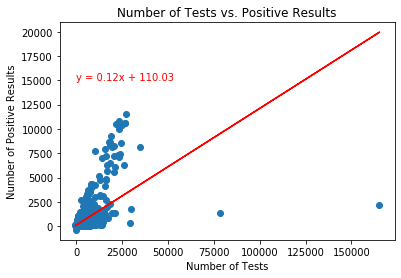

The R-squared between both factors is 0.34
The p-value is 2.1095264583594818e-251


In [8]:
x_values = covid_states_df['totalTestResultsIncrease']
y_values = covid_states_df['positiveIncrease']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,15000),fontsize=10,color="red")
plt.xlabel('Number of Tests')
plt.ylabel('Number of Positive Results')
plt.title("Number of Tests vs. Positive Results")
plt.show()
print(f"The R-squared between both factors is {round(correlation[0]*correlation[0],2)}")
print(f"The p-value is {correlation[1]}")

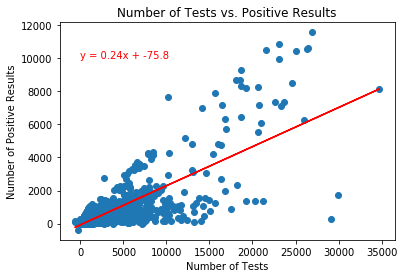

The R-squared between both factors is 0.63663
The p-value is 0.0


In [10]:
without_outliers = covid_states_df[covid_states_df['totalTestResultsIncrease'] < 50000].copy()

x_values = without_outliers['totalTestResultsIncrease']
y_values = without_outliers['positiveIncrease']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,10000),fontsize=10,color="red")
plt.xlabel('Number of Tests')
plt.ylabel('Number of Positive Results')
plt.title("Number of Tests vs. Positive Results")
plt.show()
print(f"The R-squared between both factors is {round(correlation[0]*correlation[0],5)}")
print(f"The p-value is {correlation[1]}")

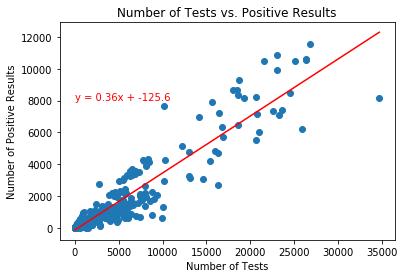

The R-squared between both factors is 0.87
The p-value is 7.498650691558495e-181


In [11]:
NY = covid_states_df[covid_states_df['state'] == 'NY'].copy()
NJ = covid_states_df[covid_states_df['state'] == 'NJ'].copy()
CT = covid_states_df[covid_states_df['state'] == 'CT'].copy()
MI = covid_states_df[covid_states_df['state'] == 'MI'].copy()
GA = covid_states_df[covid_states_df['state'] == 'GA'].copy()
MA = covid_states_df[covid_states_df['state'] == 'MA'].copy()
IL = covid_states_df[covid_states_df['state'] == 'IL'].copy()
CO = covid_states_df[covid_states_df['state'] == 'CO'].copy()
high_test_positivity_states = pd.concat([NY, NJ, CT, MI, GA, MA, IL, CO], axis=0)

x_values = high_test_positivity_states['totalTestResultsIncrease']
y_values = high_test_positivity_states['positiveIncrease']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,8000),fontsize=10,color="red")
plt.xlabel('Number of Tests')
plt.ylabel('Number of Positive Results')
plt.title("Number of Tests vs. Positive Results")
plt.show()
print(f"The R-squared between both factors is {round(correlation[0]*correlation[0],2)}")
print(f"The p-value is {correlation[1]}")

In [11]:
high_test_positivity_states.count()

date                        398
state                       398
positive                    398
negative                    392
pending                     100
hospitalizedCurrently       253
hospitalizedCumulative      213
inIcuCurrently              173
inIcuCumulative              86
onVentilatorCurrently       136
onVentilatorCumulative       86
recovered                   136
hash                        398
dateChecked                 398
death                       398
hospitalized                213
total                       398
totalTestResults            398
posNeg                      398
fips                        398
deathIncrease               398
hospitalizedIncrease        398
negativeIncrease            398
positiveIncrease            398
totalTestResultsIncrease    398
dtype: int64